#Agregando Regiões Geográficas

In [ ]:
!pip install geopandas==0.8.2
!pip install --upgrade pyshp

In [3]:
import geopandas as gpd
import pandas as pd

In [4]:
setor = gpd.read_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/RJ-SETOR/RJ-SETOR.shp')

/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


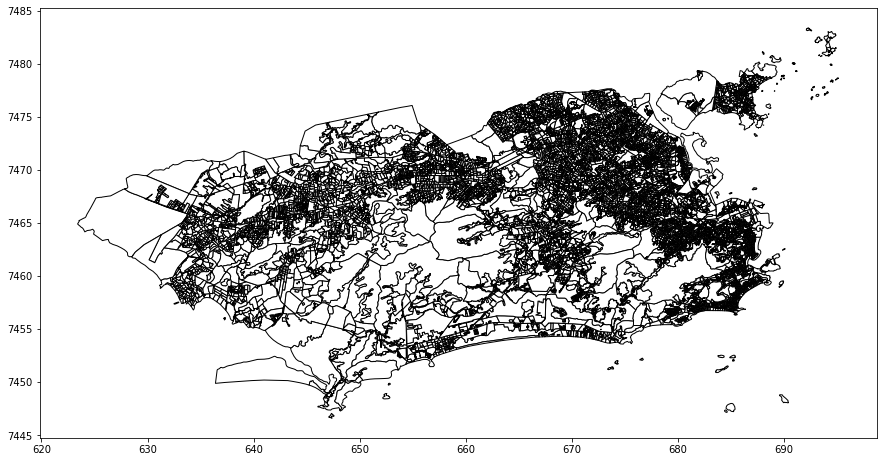

In [5]:
setor.plot(color='white',edgecolor='black',figsize=(15,8))

In [9]:
setor = setor.to_crs({'init': 'epsg:4326'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [10]:
setor_m = setor[['NM_BAIRRO', 'geometry']]

In [11]:
#Agregando por bairro
bairro = setor_m.dissolve(by='NM_BAIRRO')

/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out


In [12]:
bairro

,geometry
NM_BAIRRO,
Abolição,"POLYGON ((-43.29443 -22.89012, -43.29432 -22.8..."
Acari,"POLYGON ((-43.34253 -22.82793, -43.34314 -22.8..."
Alto da Boa Vista,"POLYGON ((-43.29408 -22.97996, -43.29412 -22.9..."
Anchieta,"POLYGON ((-43.41164 -22.83302, -43.41158 -22.8..."
Andaraí,"POLYGON ((-43.25443 -22.93426, -43.25443 -22.9..."
...,...
Vila Valqueire,"POLYGON ((-43.37717 -22.89320, -43.37681 -22.8..."
Vila da Penha,"POLYGON ((-43.31551 -22.84892, -43.31559 -22.8..."
Vista Alegre,"POLYGON ((-43.31304 -22.82951, -43.31294 -22.8..."


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


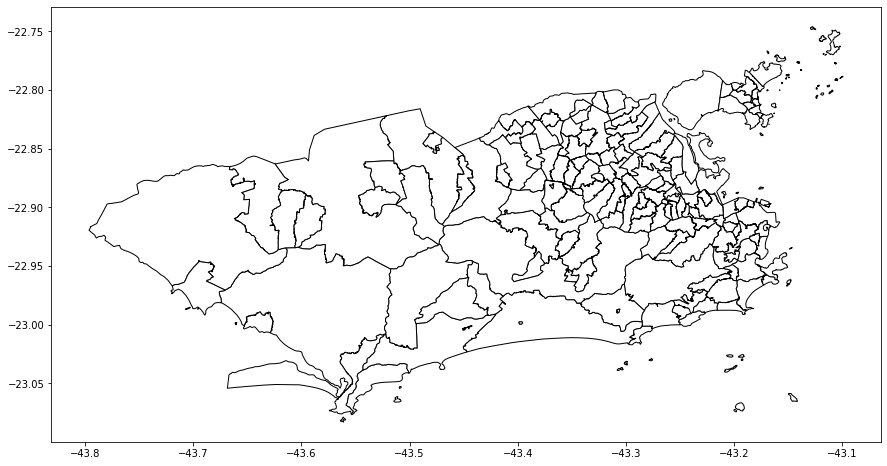

In [13]:
bairro.plot(color='white',edgecolor='black',figsize=(15,8))

In [14]:
setor_m = setor[['NM_BAIRRO', 'geometry', 'V002']]
bairro = setor_m.dissolve(by='NM_BAIRRO', aggfunc= 'sum')
bairro

/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out


,geometry,V002
NM_BAIRRO,,
Abolição,"POLYGON ((-43.29443 -22.89012, -43.29432 -22.8...",11356.0
Acari,"POLYGON ((-43.34253 -22.82793, -43.34314 -22.8...",26967.0
Alto da Boa Vista,"POLYGON ((-43.29408 -22.97996, -43.29412 -22.9...",9189.0
Anchieta,"POLYGON ((-43.41164 -22.83302, -43.41158 -22.8...",55634.0
Andaraí,"POLYGON ((-43.25443 -22.93426, -43.25443 -22.9...",39325.0
...,...,...
Vila Valqueire,"POLYGON ((-43.37717 -22.89320, -43.37681 -22.8...",32232.0
Vila da Penha,"POLYGON ((-43.31551 -22.84892, -43.31559 -22.8...",25462.0
Vista Alegre,"POLYGON ((-43.31304 -22.82951, -43.31294 -22.8...",8622.0


In [18]:
bairro = bairro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +tougs=84=0,0,0,0,0,0,0 +units=km +no_defs')

In [19]:
bairro.reset_index(inplace=True)

In [21]:
import os
dir = '/content/drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/RJ-BAIRRO'
if not os.path.exists(dir):
  os.makedirs(dir)

In [22]:
bairro.to_file(dir +'/RJ-BAIRRO.shp')